## Build Deep Neural Network with different activation functions , Adam optimization and early stoping technique

Early stopping is a technique for controlling overfitting in machine learning models, especially neural networks, by stopping training before the weights have converged. Often we stop when the performance has stopped improving on a held-out validation set
(stop training at the point when performance on a validation dataset starts to degrade)

## Task 1



### (A) Build a DNN with five hidden layers of 100 neurons each, `He initialization`, and the `ELU` activation function. Use Adam optimizer and early stopping, try training it for 30 epoch on `Fashion MNIST` but only on classes from 0 to 4, plot training & validation loss. 
(Name your model `model_elu_ex1` & the history `history_elu`)

### (B) repeate (A) by replacing `ELU` with `SELU`, `Leaky ReLU`, `ReLU`, `Tanh`, and `logistic` (with the necessary changes for each one if needed) and in each expermint plot the training & validation loss. 
(Name your new models `model_selu, model_leaky_relu, model_relu, model_tanh, model_logistic` and follow the pattern for the history name )

### (C) You should now have 6 saved models ( saved during early stopping ), load/apply these saved models on the test set for classes from 0 to 4, and record the average testing accuracy. what is your conclusion?


2.1.0
2.2.4-tf
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
Xtrain shape (30000, 28, 28)
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (D

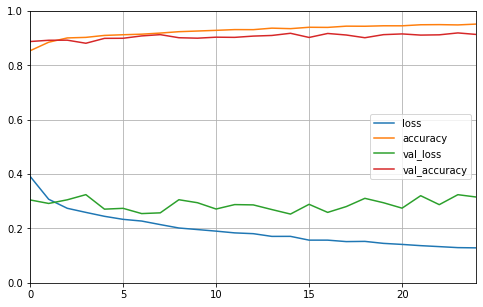

In [3]:
# Answer for (A)

# model_elu_ex1 = keras.models....
# history_elu = model_elu.fit...
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

print(X_train_full_all.shape)
print(y_train_full_all.shape)
print(X_test_all.shape)
print(y_test_all.shape)
##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if (y_train_full_all[i] == 0) or (y_train_full_all[i] == 1) or (y_train_full_all[i] == 2) or (y_train_full_all[i] == 3) or (y_train_full_all[i] == 4):
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

for i in range(len(y_test_all)):
    if (y_test_all[i] == 0) or (y_test_all[i] == 1) or (y_test_all[i] == 2) or (y_test_all[i] == 3) or (y_test_all[i] == 4):
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"]


print(type(y_train_full_all))
#print(type(y_train_full_0_4))
print("Xtrain shape", X_train_full_0_4.shape)

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

X_valid_0_4, X_train_0_4 = X_train_full_0_4[:3000] / 255.0, X_train_full_0_4[3000:] / 255.0
y_valid_0_4, y_train_0_4 = y_train_full_0_4[:3000], y_train_full_0_4[3000:]



model_elu_ex1 = keras.models.Sequential()
model_elu_ex1.add(keras.layers.Flatten(input_shape=[28, 28]))
model_elu_ex1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_elu_ex1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_elu_ex1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_elu_ex1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_elu_ex1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_elu_ex1.add(keras.layers.Dense(5, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
#tf.random.set_seed(42)
tf.random.set_seed(42)
model_elu_ex1.summary()

#hidden1 = model_elu_ex1.layers[1]
#weights, biases = hidden1.get_weights()
#print(weights)
#print(weights.shape)
#print(biases.shape)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model_elu_ex1.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
model_elu_ex1.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])



checkpoint_cb = keras.callbacks.ModelCheckpoint("model_elu_ex1.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history_elu = model_elu_ex1.fit( X_train_0_4, y_train_0_4, epochs=30,callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid_0_4, y_valid_0_4))


model_elu_ex1.evaluate(X_test_0_4, y_test_0_4)
X_new = X_test_0_4[:3]
y_proba = model_elu_ex1.predict(X_new)

y_pred = model_elu_ex1.predict_classes(X_new)
print(y_pred)

print(np.array(class_names)[y_pred])
y_new = y_test_0_4[:3]

print(y_new)

#Plotting
pd.DataFrame(history_elu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

2.1.0
2.2.4-tf
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100

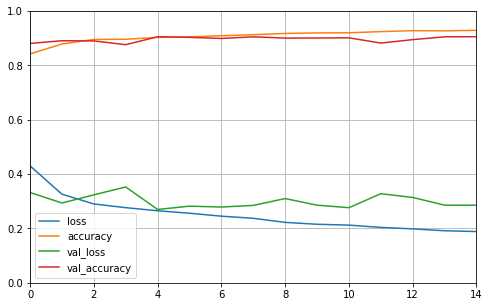

In [4]:
# Answer for (B)

# model_selu
# history_selu


import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

print(X_train_full_all.shape)
#y_train_full_all.reshape(60000,1)
print(y_train_full_all.shape)
print(X_test_all.shape)
#y_test_all.reshape(10000,1)
print(y_test_all.shape)
d = 0
##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 0 or y_train_full_all [i] == 1 or y_train_full_all [i] == 2 or y_train_full_all [i] == 3 or y_train_full_all [i] == 4:
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

for i in range(len(y_test_all)):
    if y_test_all [i] == 0 or y_test_all [i] == 1 or y_test_all [i] == 2 or y_test_all [i] == 3 or y_test_all [i] == 4:
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"]


print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_0_4))
X_train_full_0_4.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

X_valid_0_4, X_train_0_4 = X_train_full_0_4[:3000] / 255.0, X_train_full_0_4[3000:] / 255.0
y_valid_0_4, y_train_0_4 = y_train_full_0_4[:3000], y_train_full_0_4[3000:]



model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"))
model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"))
model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"))
model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"))
model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"))
model_selu.add(keras.layers.Dense(5, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_selu.summary()

#hidden1 = model_selu.layers[1]
#weights, biases = hidden1.get_weights()
#print(weights)
#print(weights.shape)
#print(biases.shape)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model_selu.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
model_selu.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])



checkpoint_cb = keras.callbacks.ModelCheckpoint("model_selu.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history_selu = model_selu.fit( X_train_0_4, y_train_0_4, epochs=30,callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid_0_4, y_valid_0_4))


model_selu.evaluate(X_test_0_4, y_test_0_4)
X_new = X_test_0_4[:3]
y_proba = model_selu.predict(X_new)

y_pred = model_selu.predict_classes(X_new)
print(y_pred)

print(np.array(class_names)[y_pred])
y_new = y_test_0_4[:3]

print(y_new)

#Plotting
pd.DataFrame(history_selu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()



2.1.0
2.2.4-tf
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100

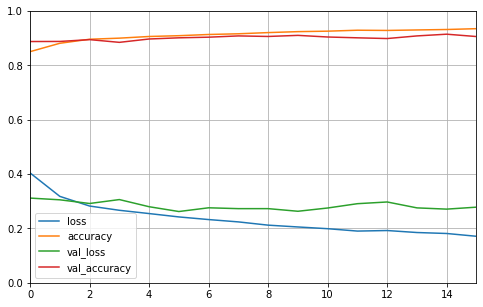

In [5]:
# model_leaky_relu
# history_leaky_relu

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

print(X_train_full_all.shape)
#y_train_full_all.reshape(60000,1)
print(y_train_full_all.shape)
print(X_test_all.shape)
#y_test_all.reshape(10000,1)
print(y_test_all.shape)
d = 0
##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 0 or y_train_full_all [i] == 1 or y_train_full_all [i] == 2 or y_train_full_all [i] == 3 or y_train_full_all [i] == 4:
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

for i in range(len(y_test_all)):
    if y_test_all [i] == 0 or y_test_all [i] == 1 or y_test_all [i] == 2 or y_test_all [i] == 3 or y_test_all [i] == 4:
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"]


print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_0_4))
X_train_full_0_4.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

X_valid_0_4, X_train_0_4 = X_train_full_0_4[:3000] / 255.0, X_train_full_0_4[3000:] / 255.0
y_valid_0_4, y_train_0_4 = y_train_full_0_4[:3000], y_train_full_0_4[3000:]

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

model_leaky_relu = keras.models.Sequential()
model_leaky_relu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_leaky_relu.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer="he_normal"))
model_leaky_relu.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer="he_normal"))
model_leaky_relu.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer="he_normal"))
model_leaky_relu.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer="he_normal"))
model_leaky_relu.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer="he_normal"))
model_leaky_relu.add(keras.layers.Dense(5, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_leaky_relu.summary()

#hidden1 = model_leaky_relu.layers[1]
#weights, biases = hidden1.get_weights()
#print(weights)
#print(weights.shape)
#print(biases.shape)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model_leaky_relu.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
model_leaky_relu.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])



checkpoint_cb = keras.callbacks.ModelCheckpoint("model_leaky_relu.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history_leaky_relu = model_leaky_relu.fit( X_train_0_4, y_train_0_4, epochs=30,callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid_0_4, y_valid_0_4))


model_leaky_relu.evaluate(X_test_0_4, y_test_0_4)
X_new = X_test_0_4[:3]
y_proba = model_leaky_relu.predict(X_new)

y_pred = model_leaky_relu.predict_classes(X_new)
print(y_pred)

print(np.array(class_names)[y_pred])
y_new = y_test_0_4[:3]

print(y_new)

#Plotting
pd.DataFrame(history_leaky_relu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

2.1.0
2.2.4-tf
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100

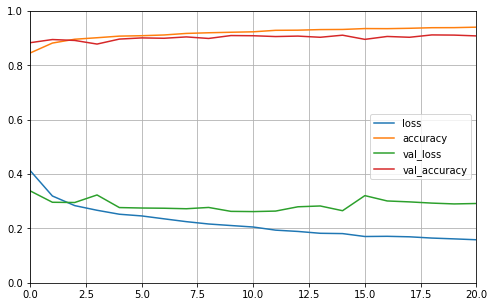

In [6]:
# model_relu
# history_relu

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

print(X_train_full_all.shape)
#y_train_full_all.reshape(60000,1)
print(y_train_full_all.shape)
print(X_test_all.shape)
#y_test_all.reshape(10000,1)
print(y_test_all.shape)
d = 0
##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 0 or y_train_full_all [i] == 1 or y_train_full_all [i] == 2 or y_train_full_all [i] == 3 or y_train_full_all [i] == 4:
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

for i in range(len(y_test_all)):
    if y_test_all [i] == 0 or y_test_all [i] == 1 or y_test_all [i] == 2 or y_test_all [i] == 3 or y_test_all [i] == 4:
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"]


print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_0_4))
X_train_full_0_4.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

X_valid_0_4, X_train_0_4 = X_train_full_0_4[:3000] / 255.0, X_train_full_0_4[3000:] / 255.0
y_valid_0_4, y_train_0_4 = y_train_full_0_4[:3000], y_train_full_0_4[3000:]



model_relu = keras.models.Sequential()
model_relu.add(keras.layers.Flatten(input_shape=[28, 28]))
model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model_relu.add(keras.layers.Dense(5, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_relu.summary()

#hidden1 = model_relu.layers[1]
#weights, biases = hidden1.get_weights()
#print(weights)
#print(weights.shape)
#print(biases.shape)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model_relu.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
model_relu.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])



checkpoint_cb = keras.callbacks.ModelCheckpoint("model_relu.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history_relu = model_relu.fit( X_train_0_4, y_train_0_4, epochs=30,callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid_0_4, y_valid_0_4))


model_relu.evaluate(X_test_0_4, y_test_0_4)
X_new = X_test_0_4[:3]
y_proba = model_relu.predict(X_new)

y_pred = model_relu.predict_classes(X_new)
print(y_pred)

print(np.array(class_names)[y_pred])
y_new = y_test_0_4[:3]

print(y_new)

#Plotting
pd.DataFrame(history_relu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()



2.1.0
2.2.4-tf
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100

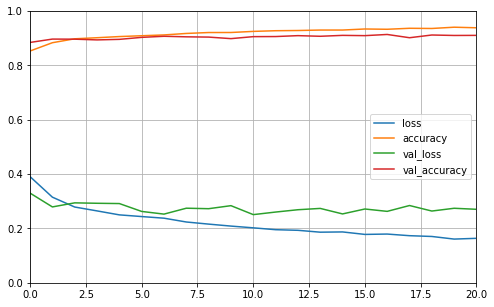

In [7]:
# model_tanh
# history_tanh

# model_tanh
# history_tanh

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

print(X_train_full_all.shape)
#y_train_full_all.reshape(60000,1)
print(y_train_full_all.shape)
print(X_test_all.shape)
#y_test_all.reshape(10000,1)
print(y_test_all.shape)
d = 0
##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 0 or y_train_full_all [i] == 1 or y_train_full_all [i] == 2 or y_train_full_all [i] == 3 or y_train_full_all [i] == 4:
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

for i in range(len(y_test_all)):
    if y_test_all [i] == 0 or y_test_all [i] == 1 or y_test_all [i] == 2 or y_test_all [i] == 3 or y_test_all [i] == 4:
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"]


print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_0_4))
X_train_full_0_4.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

X_valid_0_4, X_train_0_4 = X_train_full_0_4[:3000] / 255.0, X_train_full_0_4[3000:] / 255.0
y_valid_0_4, y_train_0_4 = y_train_full_0_4[:3000], y_train_full_0_4[3000:]



model_tanh = keras.models.Sequential()
model_tanh.add(keras.layers.Flatten(input_shape=[28, 28]))
model_tanh.add(keras.layers.Dense(100, activation="tanh", kernel_initializer="he_normal"))
model_tanh.add(keras.layers.Dense(100, activation="tanh", kernel_initializer="he_normal"))
model_tanh.add(keras.layers.Dense(100, activation="tanh", kernel_initializer="he_normal"))
model_tanh.add(keras.layers.Dense(100, activation="tanh", kernel_initializer="he_normal"))
model_tanh.add(keras.layers.Dense(100, activation="tanh", kernel_initializer="he_normal"))
model_tanh.add(keras.layers.Dense(5, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_tanh.summary()

#hidden1 = model_tanh.layers[1]
#weights, biases = hidden1.get_weights()
#print(weights)
#print(weights.shape)
#print(biases.shape)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model_tanh.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
model_tanh.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])



checkpoint_cb = keras.callbacks.ModelCheckpoint("model_tanh.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history_tanh = model_tanh.fit( X_train_0_4, y_train_0_4, epochs=30,callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid_0_4, y_valid_0_4))


model_tanh.evaluate(X_test_0_4, y_test_0_4)
X_new = X_test_0_4[:3]
y_proba = model_tanh.predict(X_new)

y_pred = model_tanh.predict_classes(X_new)
print(y_pred)

print(np.array(class_names)[y_pred])
y_new = y_test_0_4[:3]

print(y_new)

#Plotting
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

2.1.0
2.2.4-tf
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100

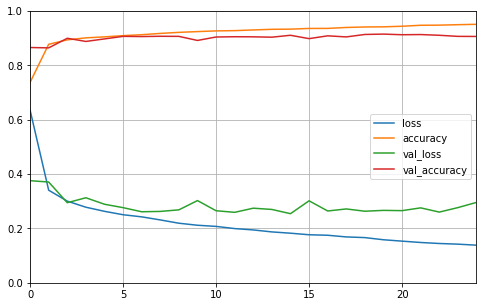

In [8]:
# model_logistic
# history_logistic

# model_logistic
# history_logistic

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_0_4 = []
y_train_full_0_4 = []
X_test_0_4 = []
y_test_0_4 = []

print(X_train_full_all.shape)
#y_train_full_all.reshape(60000,1)
print(y_train_full_all.shape)
print(X_test_all.shape)
#y_test_all.reshape(10000,1)
print(y_test_all.shape)
d = 0
##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 0 or y_train_full_all [i] == 1 or y_train_full_all [i] == 2 or y_train_full_all [i] == 3 or y_train_full_all [i] == 4:
        y_train_full_0_4.append(y_train_full_all[i])
        X_train_full_0_4.append(X_train_full_all[i])
    else:
        continue
        
y_train_full_0_4 = np.array(y_train_full_0_4)
X_train_full_0_4 = np.array(X_train_full_0_4)  

for i in range(len(y_test_all)):
    if y_test_all [i] == 0 or y_test_all [i] == 1 or y_test_all [i] == 2 or y_test_all [i] == 3 or y_test_all [i] == 4:
        y_test_0_4.append(y_test_all[i])
        X_test_0_4.append(X_test_all[i])
    else:
        continue
y_test_0_4 = np.array(y_test_0_4)
X_test_0_4 = np.array(X_test_0_4)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"]


print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_0_4))
X_train_full_0_4.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

X_valid_0_4, X_train_0_4 = X_train_full_0_4[:3000] / 255.0, X_train_full_0_4[3000:] / 255.0
y_valid_0_4, y_train_0_4 = y_train_full_0_4[:3000], y_train_full_0_4[3000:]



model_logistic = keras.models.Sequential()
model_logistic.add(keras.layers.Flatten(input_shape=[28, 28]))
model_logistic.add(keras.layers.Dense(100, activation="sigmoid", kernel_initializer="he_normal"))
model_logistic.add(keras.layers.Dense(100, activation="sigmoid", kernel_initializer="he_normal"))
model_logistic.add(keras.layers.Dense(100, activation="sigmoid", kernel_initializer="he_normal"))
model_logistic.add(keras.layers.Dense(100, activation="sigmoid", kernel_initializer="he_normal"))
model_logistic.add(keras.layers.Dense(100, activation="sigmoid", kernel_initializer="he_normal"))
model_logistic.add(keras.layers.Dense(5, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_logistic.summary()

#hidden1 = model_logistic.layers[1]
#weights, biases = hidden1.get_weights()
#print(weights)
#print(weights.shape)
#print(biases.shape)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model_logistic.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
model_logistic.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])



checkpoint_cb = keras.callbacks.ModelCheckpoint("model_logistic.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history_logistic = model_logistic.fit( X_train_0_4, y_train_0_4, epochs=30,callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid_0_4, y_valid_0_4))


model_logistic.evaluate(X_test_0_4, y_test_0_4)
X_new = X_test_0_4[:3]
y_proba = model_logistic.predict(X_new)

y_pred = model_logistic.predict_classes(X_new)
print(y_pred)

print(np.array(class_names)[y_pred])
y_new = y_test_0_4[:3]

print(y_new)

#Plotting
pd.DataFrame(history_logistic.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
# Answer for (C)
print(y_test_0_4.shape)
print(X_test_0_4.shape)

print("test accuracy and loss for ELU")
test_accuracy_elu = model_elu_ex1.evaluate(X_test_0_4, y_test_0_4)
print(test_accuracy_elu)
print("-----------------------------------------------------")

print("test accuracy and loss for SELU")
test_accuracy_selu = model_selu.evaluate(X_test_0_4, y_test_0_4)
print(test_accuracy_selu)
print("-----------------------------------------------------")

print("test accuracy and loss for Leaky RELU")
test_accuracy_leaky_relu = model_leaky_relu.evaluate(X_test_0_4, y_test_0_4)
print(test_accuracy_leaky_relu)
print("-----------------------------------------------------")

print("test accuracy and loss for  RELU")
test_accuracy_relu = model_relu.evaluate(X_test_0_4, y_test_0_4)
print(test_accuracy_relu)
print("-----------------------------------------------------")

print("test accuracy and loss for  tanh")
test_accuracy_model_tanh = model_tanh.evaluate(X_test_0_4, y_test_0_4)
print(test_accuracy_model_tanh)
print("-----------------------------------------------------")

print("test accuracy and loss for logistic")
test_accuracy_model_logistic = model_logistic.evaluate(X_test_0_4, y_test_0_4)
print(test_accuracy_model_logistic)
print("-----------------------------------------------------")

################################################################################################################3

#
#Conclusion
#
#Least loss and max accuarcy is tanh activation function which indicates that this is good activation function for this model
#logistic is slightly near tanh which indicates that it is also very good which indicates that this is good activation function for this model.
#
#Worest accuracy is SELU which indicates that this not good activation function for this model
#Highest loss Leaky RELU which indicates that this not good activation function for this model

(5000,)
(5000, 28, 28)
test accuracy and loss for ELU
5000/5000 [==============================] - 0s 67us/sample - loss: 44.1182 - accuracy: 0.8130
[44.11824823299274, 0.813]
-----------------------------------------------------
test accuracy and loss for SELU
5000/5000 [==============================] - 0s 67us/sample - loss: 34.0722 - accuracy: 0.7114
[34.07221327819824, 0.7114]
-----------------------------------------------------
test accuracy and loss for Leaky RELU
5000/5000 [==============================] - 0s 69us/sample - loss: 41.2799 - accuracy: 0.8846
[41.279943188476565, 0.8846]
-----------------------------------------------------
test accuracy and loss for  RELU
5000/5000 [==============================] - 0s 66us/sample - loss: 44.0198 - accuracy: 0.8618
[44.019848615927714, 0.8618]
-----------------------------------------------------
test accuracy and loss for  tanh
5000/5000 [==============================] - 0s 69us/sample - loss: 0.3212 - accuracy: 0.8830
[0.3212

#Conclusion
#Least loss and max accuarcy is tanh activation function which indicates that this is good activation function for this model

#logistic is slightly near tanh which indicates that it is also very good which indicates that this is good activation function for this model.

#Worest accuracy is SELU which indicates that this not good activation function for this model
#Highest loss Leaky RELU & ELU which indicates that this not good activation function for this model


## Task 2

### (A) Load the pretrained model from question 1:(A), freeze all layers and replace the softmax layer with a new one to classify images with classes from 5 to 9. Use Adam optimizer and train it for 30 epoch.
(Name your model model_elu_ex2)

### (B) Repeat (A) but this time with unfreezing the last two hidden layers from the pretrained model.

### (c) compare between (A) & (B) with respect to training time & loss curves

In [10]:
# Answer for (A)

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_5_9 = []
y_train_full_5_9 = []
X_test_5_9 = []
y_test_5_9 = []

print(X_train_full_all.shape)
print(y_train_full_all.shape)
print(X_test_all.shape)
print(y_test_all.shape)

##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 5 or y_train_full_all [i] == 6 or y_train_full_all [i] == 7 or y_train_full_all [i] == 8 or y_train_full_all [i] == 9:
        y_train_full_5_9.append(y_train_full_all[i] - 5)
        X_train_full_5_9.append(X_train_full_all[i])
    else:
        continue
   
y_train_full_5_9 = np.array(y_train_full_5_9)

X_train_full_5_9 = np.array(X_train_full_5_9)

print("y_train_full_5_9", y_train_full_5_9.shape)

for i in range(len(y_test_all)):
    if y_test_all [i] == 5 or y_test_all [i] == 6 or y_test_all [i] == 7 or y_test_all [i] == 8 or y_test_all [i] == 9:
        y_test_5_9.append(y_test_all[i] - 5)
        X_test_5_9.append(X_test_all[i])
    else:
        continue

y_test_5_9 = np.array(y_test_5_9)
X_test_5_9 = np.array(X_test_5_9)
print("y_test_5_9", y_test_5_9.shape)
print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_5_9))
X_train_full_5_9.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_5_9.shape)
print(X_test_5_9.shape)

X_valid_5_9, X_train_5_9 = X_train_full_5_9[:3000] / 255.0, X_train_full_5_9[3000:] / 255.0
y_valid_5_9, y_train_5_9 = y_train_full_5_9[:3000], y_train_full_5_9[3000:]

start_time_A = time.time()
model_elu_ex1 = keras.models.load_model("model_elu_ex1.h5")
model_elu_ex2 = keras.models.Sequential(model_elu_ex1.layers[:-1])
model_elu_ex2.summary()

model_elu_ex2.add(keras.layers.Dense(5, name = 'dense_5', activation="softmax"))

model_elu_ex1_clone = keras.models.clone_model(model_elu_ex1)
model_elu_ex1_clone.set_weights(model_elu_ex1.get_weights())

for layer in model_elu_ex2.layers[:-1]:
    layer.trainable = False

model_elu_ex2.compile(loss="sparse_categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_elu_ex2.summary()

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_elu_ex2.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])
history_A = model_elu_ex2.fit(X_train_5_9, y_train_5_9, epochs=30, validation_data=(X_valid_5_9, y_valid_5_9))
end_time_A = time.time()



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
y_train_full_5_9 (30000,)
y_test_5_9 (5000,)
<class 'numpy.ndarray'>
test shapes
(10000,)
(10000, 28, 28)
(5000,)
(5000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (

In [11]:
# Answer for (B)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

(X_train_full_all, y_train_full_all), (X_test_all, y_test_all) = tf.keras.datasets.fashion_mnist.load_data()


X_train_full_5_9 = []
y_train_full_5_9 = []
X_test_5_9 = []
y_test_5_9 = []

print(X_train_full_all.shape)
#y_train_full_all.reshape(60000,1)
print(y_train_full_all.shape)
print(X_test_all.shape)
#y_test_all.reshape(10000,1)
print(y_test_all.shape)

##Filtering data to get only Classes from zero to Four
for i in range(len(y_train_full_all)):
    if y_train_full_all [i] == 5 or y_train_full_all [i] == 6 or y_train_full_all [i] == 7 or y_train_full_all [i] == 8 or y_train_full_all [i] == 9:
        y_train_full_5_9.append(y_train_full_all[i] - 5)
        X_train_full_5_9.append(X_train_full_all[i])
    else:
        continue
y_train_full_5_9 = np.array(y_train_full_5_9)
X_train_full_5_9 = np.array(X_train_full_5_9)  


        
print(y_train_full_5_9)
print(X_train_full_5_9)


for i in range(len(y_test_all)):
    if y_test_all [i] == 5 or y_test_all [i] == 6 or y_test_all [i] == 7 or y_test_all [i] == 8 or y_test_all [i] == 9:
        y_test_5_9.append(y_test_all[i] - 5)
        X_test_5_9.append(X_test_all[i])
    else:
        continue

y_test_5_9 = np.array(y_test_5_9)
X_test_5_9 = np.array(X_test_5_9)
	

print(type(y_train_full_all))
X_train_full_all[1].shape
#print(type(y_train_full_5_9))
X_train_full_5_9.shape

print("test shapes")
print(y_test_all.shape)
print(X_test_all.shape)
print(y_test_5_9.shape)
print(X_test_5_9.shape)

X_valid_5_9, X_train_5_9 = X_train_full_5_9[:3000] / 255.0, X_train_full_5_9[3000:] / 255.0
y_valid_5_9, y_train_5_9 = y_train_full_5_9[:3000], y_train_full_5_9[3000:]


start_time_B = time.time()
model_elu_ex1 = keras.models.load_model("model_elu_ex1.h5")
model_elu_ex2 = keras.models.Sequential(model_elu_ex1.layers[:-1])
model_elu_ex2.summary()

model_elu_ex2.add(keras.layers.Dense(5, name = 'dense_5', activation="softmax"))

model_elu_ex1_clone = keras.models.clone_model(model_elu_ex1)
model_elu_ex1_clone.set_weights(model_elu_ex1.get_weights())

for layer in model_elu_ex2.layers[:-3]:
    layer.trainable = False

model_elu_ex2.compile(loss="sparse_categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_elu_ex2.summary()

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_elu_ex2.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer, metrics=["accuracy"])
history_B = model_elu_ex2.fit(X_train_5_9, y_train_5_9, epochs=30, validation_data=(X_valid_5_9, y_valid_5_9))
end_time_B = time.time()


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[4 2 0 ... 3 0 0]
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0  

Train: 779.057, Test: 795.217


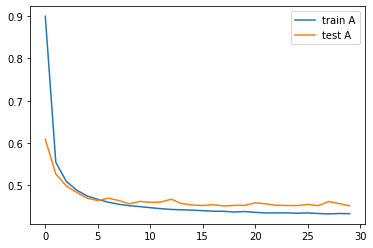

Time elapsed for training model A 68.6727283000946
Train: 779.057, Test: 795.217


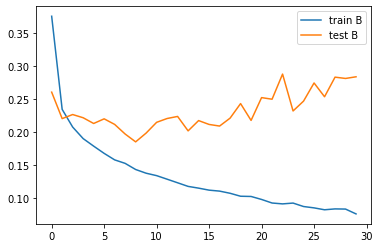

Time elapsed for training model A 72.80150508880615


In [12]:
# Answer for (C)
from matplotlib import pyplot
train_acc_A = model_elu_ex2.evaluate(X_train_full_5_9, y_train_full_5_9, verbose=0)
test_acc_A = model_elu_ex2.evaluate(X_test_5_9, y_test_5_9, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_A[0], test_acc_A[0]))
# plot training history
pyplot.plot(history_A.history['loss'], label='train A')
pyplot.plot(history_A.history['val_loss'], label='test A')
pyplot.legend()
pyplot.show()

print("Time elapsed for training model A",end_time_A - start_time_A )

from matplotlib import pyplot
train_acc_B = model_elu_ex2.evaluate(X_train_full_5_9, y_train_full_5_9, verbose=0)
test_acc_B = model_elu_ex2.evaluate(X_test_5_9, y_test_5_9, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_A[0], test_acc_A[0]))
# plot training history
pyplot.plot(history_B.history['loss'], label='train B')
pyplot.plot(history_B.history['val_loss'], label='test B')
pyplot.legend()
pyplot.show()

print("Time elapsed for training model A",end_time_B - start_time_B )

# Conclusion
# Model A is very good because it has low bias and low variance
# Model B is not good because it has high variance means overfitting 

#Model B took time more than Model A and this is expected because Model A all hideen layers are traiend and we just re-used them
#but Model B we re-trained last two hidden layers which also as expect took more time